In [1]:
#Need to get X and Y
#Going through metrics
import numbers
import glob
import os
import csv

if True:
    combined_data_ = {}
    target_kernels = []
    
metric_targets = []
all_sig_metrics = []
#bench_targets = [ "gaussianP" , "gaussianV", "gemm", "stream", "kmeans_cudaV", "kmeans_cudaP" ]
#for filen_ in glob.glob("/home/yzamora/power/nvidia_gpus/all_apps/mixed_results/*.csv"):
#for filen_ in glob.glob("/home/yzamora/power/nvidia_gpus/all_apps/gaussian_results/*.csv"):
#for filen_ in glob.glob("/gpfs/jlse-fs0/users/yzamora/v100_testing/v100_p100_results/*.csv"):
for filen_ in glob.glob("/gpfs/jlse-fs0/users/yzamora/p100_testing/five_apps/*.csv"):
    filen = os.path.basename(filen_)
    #print (filen)
    filen_split = filen.split('.')[0].split('_')
    bench_name = filen_split[0]
    size = filen_split[1]
    
    #Run if applications contain kmeans in name
    if False: 
        if 'kmeans' in filen_split[0]:
            size = (filen.split('.')[0].split('N')[1])
        else:
            size = filen_split[1].split('N')[1]
    
    #metric_name = filen_split[1]
    #print(filen_split[0][-1]) #gives you p or v
    #size_str = filen_split[1].split('N')[1]
    
    #if not (metric_name in metric_targets): continue
    #if not (bench_name in bench_targets): continue
    
    key_root = bench_name
    #print(key_root)
    levels = ["Idle", "Low","High", "Max"]
    bw_units = ["GB", "MB", "KB" ,"0B"]
    # Now open the file and look for the data
    with open(filen_ ,'r') as file_handle:
        #print (file_handle)
        data_found = False
        ncols = 1
        fdata = csv.reader(file_handle)
        index_lookup = {}
        #print(filen_)
        for line_split in fdata:
            #print (line_split)
            lsplt = (len(line_split) > 0)
      
            if data_found:
                #print("data found")
                if lsplt and len(line_split) == ncols:
                    #percent - strip off end
                    # Get metric name here
                    #mname_index = index_lookup['Metric Name']
                    #metric_name = line_split[ mname_index ]
                    #if not (metric_name in metric_targets): continue
                    
                    # Read in desired value for the current metric
                    target_index = index_lookup['Avg']; value = 0
                    metric_name = line_split[index_lookup['Metric Name']]
                    #print (line_split[target_index].isdecimal())
                    if line_split[target_index].isdecimal():
                        if line_split[target_index]!= '0':
                            #print(line_split[target_index])
                            all_sig_metrics.append(metric_name)
                            value = int(line_split[ target_index ])
                        
                        # Labeled with percentage
                    elif "%" == line_split[target_index][-1]:
                        #print ("percentage loop")
                        all_sig_metrics.append(metric_name)
                        value = float(line_split[ target_index ][0:7]) / 100.0
                        
                    # Labeled with bandwidth units
                    elif line_split[ target_index ][-4:-2] in bw_units:
                        # Just take the first 
                        units = line_split[ target_index ][-4:-2]
                        all_sig_metrics.append(metric_name)
                        mfact = 1.0
                        if   units == "KB": mfact = 1024
                        elif units == "MB": mfact = 1024*1024
                        elif units == "GB": mfact = 1024*1024*1024
                        elif units == "0B":  mfact = 1
                        value = float(line_split[ target_index ][0:7]) * mfact
                    
                    # idle, low, max
                    elif line_split[ target_index ][-1] == ")":
                        #print ("low")
                        all_sig_metrics.append(metric_name)
                        value = int(line_split[ target_index].split('(')[1].split(")")[0])
                        
                    # otherwise, float
                    #elif not(float(line_split[ target_index ]).is_integer()):
                    else:
                        #print(line_split[ target_index ].split('(')[0])
                        #print("in float")
                        #print(line_split[ target_index ].split('(')[0])
                        value = float(line_split[ target_index ])
                    
                    
                    
                     # Parse name of kernel
                    kernel_name = line_split[ index_lookup['Kernel'] ].split('(')[0]
                    # Define kernel-specific key
                    key = key_root + size + "_" + kernel_name 
                    
                    # Initialize dict for this key, if it is new
                    if not (key in combined_data_): 
                        combined_data_ [ key ] = {}
                    if not (kernel_name in target_kernels):
                        target_kernels.append(kernel_name)
                        #combined_data_ [ key ][ 'size' ] = int( size_str )
                        
                    # Store value for the metric being read right now
                    combined_data_ [key][ metric_name ] = value
                    combined_data_[key]["kernelname"] = kernel_name
                    
                else: data_found = False


            elif lsplt and line_split[0] == 'Device' and line_split[1] == 'Kernel':
                # Set flag that we are at the data:
                data_found = True
                # Set number of columns in table:
                ncols = len(line_split)
                # Generate an index lookup table:
                idx = 0
                for term in line_split:
                    index_lookup[term] = idx
                    idx += 1
                #print(index_lookup)



In [2]:
print(combined_data_['gemmN5216_sgemm_128x128x8_NN_vec'].keys())

dict_keys(['inst_per_warp', 'kernelname', 'branch_efficiency', 'warp_execution_efficiency', 'warp_nonpred_execution_efficiency', 'inst_replay_overhead', 'shared_load_transactions_per_request', 'shared_store_transactions_per_request', 'local_load_transactions_per_request', 'local_store_transactions_per_request', 'gld_transactions_per_request', 'gst_transactions_per_request', 'shared_store_transactions', 'shared_load_transactions', 'local_load_transactions', 'local_store_transactions', 'gld_transactions', 'gst_transactions', 'sysmem_read_transactions', 'sysmem_write_transactions', 'l2_read_transactions', 'l2_write_transactions', 'dram_read_transactions', 'dram_write_transactions', 'global_hit_rate', 'local_hit_rate', 'gld_requested_throughput', 'gst_requested_throughput', 'gld_throughput', 'gst_throughput', 'local_memory_overhead', 'tex_cache_hit_rate', 'l2_tex_read_hit_rate', 'l2_tex_write_hit_rate', 'dram_read_throughput', 'dram_write_throughput', 'tex_cache_throughput', 'l2_tex_read_t

In [3]:
#Obtaining y vector
import numpy as np
Y = []
for key, value in combined_data_.items():
    Y.append(combined_data_[key]['ipc'])
    
print(np.array(Y).shape)

(958,)


In [4]:
#Obtaining X vector
import os
import sys
import pandas as pd
from sklearn.preprocessing import scale
#print(combined_data_.keys())
df = pd.DataFrame.from_dict(combined_data_,orient='index')
df = df.dropna(axis=1,how='any')
#print(df.shape)
#print(df)
labels = df['kernelname'].tolist()
df2 = df.drop(columns=['kernelname'])
df2_values = df2.values
data = scale(df2.values)
n_samples, n_features = data.shape
print(n_samples, n_features)
X = data

958 118


/home/yzamora/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [34]:
#Scaling X
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

BR: Mean squared error: -0.619408 (+/- 0.076589) 
KNN: Mean squared error: -0.737759 (+/- 0.114930) 
SVM: Mean squared error: -0.774578 (+/- 0.149959) 
RF: Mean squared error: -0.626301 (+/- 0.077045) 


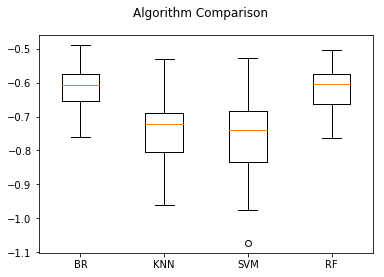

In [46]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import BayesianRidge
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.gaussian_process.kernels import RBF

# load dataset
#url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
#names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
#dataframe = pandas.read_csv(url, names=names)
#array = dataframe.values
#X = array[:,0:8]
#Y = array[:,8]
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
#models.append(('LR', LogisticRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('CART', DecisionTreeClassifier()))
#models.append(('NB', GaussianNB()))
models.append(('BR', BayesianRidge(compute_score=True)))
models.append(('KNN', KNeighborsRegressor()))
models.append(('SVM', SVR()))
models.append(('RF', RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    #cv = KFold(len(y), nfolds)
    #cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring="neg_mean_squared_error")
    results.append(cv_results)
    names.append(name)
    msg = "%s: Mean squared error: %f (+/- %f) " % (name, cv_results.mean(), cv_results.std())
    print(msg)



# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()